Imports necesarios

In [42]:
import pandas as pd
import unicodedata
import contractions
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
df

#df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

if "Unnamed: 2" in df.columns:
    df = df.drop(['Unnamed: 2'], axis=1)

if "Unnamed: 3" in df.columns:
    df = df.drop(['Unnamed: 3'], axis=1)

if "Unnamed: 4" in df.columns:
    df = df.drop(['Unnamed: 4'], axis=1)
    

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

Convirtiendo de mayúsculas a minúsculas

In [5]:
df['v1'] = df['v1'].str.lower()
df['v2'] = df['v2'].str.lower()

#df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

if "Unnamed: 2" in df.columns:
    df = df.drop(['Unnamed: 2'], axis=1)

if "Unnamed: 3" in df.columns:
    df = df.drop(['Unnamed: 3'], axis=1)

if "Unnamed: 4" in df.columns:
    df = df.drop(['Unnamed: 4'], axis=1)

df

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

Quitando abreviaciones de las oraciones.

In [6]:
# Expandiendo las contracciones en la columna 'v2'
df['v2'] = df['v2'].apply(lambda x: ' '.join([contractions.fix(word) for word in x.split()]))

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

df

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif you oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,you dun say so early hor... you c already then...
4,ham,"nah i do not think he goes to usf, he lives ar..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact y...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i w...


Quitando acentos de las oraciones

In [7]:
def removerAcentos(texto):
    texto = unicodedata.normalize('NFKD', texto).encode('ascii','ignore').decode('utf-8','ignore')
    return texto

df['v2'] = df['v2'].apply(removerAcentos)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

Eliminando los stopwords

In [8]:
nltk.download('stopwords')

# Definiendo la lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

df['v2'] = df['v2'].apply(remove_stopwords)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,v1,v2
0,ham,"go jurong point, crazy.. available bugis n gre..."
1,ham,ok lar... joking wif oni...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,dun say early hor... c already say...
4,ham,"nah think goes usf, lives around though"
...,...,...
5567,spam,2nd time tried 2 contact you. a750 pound prize...
5568,ham,i_ b going esplanade fr home?
5569,ham,"pity, * mood that. so...any suggestions?"
5570,ham,guy bitching acted like would interested buyin...


Eliminando caracteres especiales

In [9]:
def removerCaracteresEspecialesNumerosSimbolos(texto, removerDigitos=False):
    patron = r'[^a-zA-Z0-9\s]' if not removerDigitos else r'[^a-zA-Z\s]'
    texto = re.sub(patron, '', texto)
    return texto

def aplicar_removerCaracteresEspeciales(df, columna, removerDigitos=False):
    df[columna] = df[columna].apply(lambda x: removerCaracteresEspecialesNumerosSimbolos(x, removerDigitos))
    return df

df = aplicar_removerCaracteresEspeciales(df, 'v2')

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

df

,v1,v2
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,dun say early hor c already say
4,ham,nah think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact you a750 pound prize ...
5568,ham,i b going esplanade fr home
5569,ham,pity mood that soany suggestions
5570,ham,guy bitching acted like would interested buyin...


Generando otras características en el dataset

Calculando la puntuación

In [10]:
# def calculate_feature(text):
#     punctuation_count = sum(1 for char in text if char in string.punctuation)
#     if len(text) == 0:
#         return 0
#     return punctuation_count / len(text)

# # Aplicar la función al conjunto de datos
# df['Punctuation_Count/char_count'] = df['v2'].apply(calculate_feature)

# new_csv_path = './new_dataset.csv'
# df.to_csv(new_csv_path, index=False)
# df

Stopwords únicos

In [11]:
# # Definiendo las palabras de parada en inglés
# stop_words = set(stopwords.words('english'))

# # Función para calcular la característica
# def calculate_feature(text):
#     words = word_tokenize(text)
#     if len(words) == 0:
#         return 0
#     unique_stopwords = len(set(w for w in words if w in stop_words))
#     return unique_stopwords / len(words)

# # Aplicar la función al conjunto de datos
# df['Unique_Stopword_Count/word_count'] = df['v2'].apply(calculate_feature)

# new_csv_path = './new_dataset.csv'
# df.to_csv(new_csv_path, index=False)

Conteo de palabras

In [12]:
# # Función para calcular la característica
# def calculate_feature(text):
#     punctuation_count = sum(1 for char in text if char in string.punctuation and char != "'")
#     return punctuation_count

# df['Punctuation_Count'] = df['v2'].apply(calculate_feature)

# new_csv_path = './new_dataset.csv'
# df.to_csv(new_csv_path, index=False)

Stopwords en cara a las palabras únicas de los mensajes

In [13]:
# # Definir las palabras de parada en inglés
# stop_words = set(stopwords.words('english'))

# # Función para calcular la característica
# def calculate_feature(text):
#     words = word_tokenize(text)
#     stopword_count = len([w for w in words if w in stop_words])
#     unique_word_count = len(set(words))
#     if unique_word_count == 0:
#         return 0
#     return stopword_count / unique_word_count

# # Aplicar la función al conjunto de datos
# df['Stopword_Count/Unique_Word_Count'] = df['v2'].apply(calculate_feature)

# new_csv_path = './new_dataset.csv'
# df.to_csv(new_csv_path, index=False)

Stopwords únicas 

In [14]:
stop_words = set(stopwords.words('english'))

def calculate_feature(text):
    words = word_tokenize(text)
    unique_stopwords = len(set(w for w in words if w in stop_words))
    return unique_stopwords

df['Unique_Stopword_Count'] = df['v2'].apply(calculate_feature)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

Cantidad de palabras

In [15]:
def calculate_feature(text):
    words = word_tokenize(text)
    return len(words)

df['Word_Count'] = df['v2'].apply(calculate_feature)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

Stopword count

In [16]:
stop_words = set(stopwords.words('english'))

def calculate_feature(text):
    words = word_tokenize(text)
    stopword_count = len([w for w in words if w in stop_words])
    return stopword_count

df['Stopword_Count'] = df['v2'].apply(calculate_feature)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

Stem count

In [17]:
# Inicializar el stemmer
stemmer = PorterStemmer()

def calculate_feature(text):
    words = word_tokenize(text)
    stems = [stemmer.stem(word) for word in words]
    unique_stems = len(set(stems))
    return unique_stems

df['Unique_Stem_Count'] = df['v2'].apply(calculate_feature)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

Palabras únicas

In [18]:
def calculate_feature(text):
    words = word_tokenize(text)
    unique_words = len(set(words))
    return unique_words

df['Unique_Word_Count'] = df['v2'].apply(calculate_feature)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

Palabras únicas en cara al conteo de palabras

In [19]:
def calculate_feature(text):
    words = word_tokenize(text)
    unique_words = len(set(words))
    if len(words) == 0:
        return 0
    return unique_words / len(words)

df['Unique_Word_Count/Word_Count'] = df['v2'].apply(calculate_feature)

new_csv_path = './new_dataset.csv'
df.to_csv(new_csv_path, index=False)

Modelos BoG y TF-IDF

Primer modelo

BoG

In [20]:
data = pd.read_csv('spam.csv', encoding='latin-1')

messages = data["v2"].tolist()

# BoG con n=1
vectorizer_bog_1 = CountVectorizer()
bog_1_matrix = vectorizer_bog_1.fit_transform(messages)
bog_1_features = vectorizer_bog_1.get_feature_names_out()


# Ejemplos de mensajes en representación BoG (n=1)
print("Ejemplos de mensajes en representación BoG (n=1):")
for i in range(3):
    print(f"Mensaje {i + 1}:")
    print(bog_1_matrix[i])
    print()

Ejemplos de mensajes en representación BoG (n=1):
Mensaje 1:
  (0, 3550)	1
  (0, 8030)	1
  (0, 4350)	1
  (0, 5920)	1
  (0, 2327)	1
  (0, 1303)	1
  (0, 5537)	1
  (0, 4087)	1
  (0, 1751)	1
  (0, 3634)	1
  (0, 8489)	1
  (0, 4476)	1
  (0, 1749)	1
  (0, 2048)	1
  (0, 7645)	1
  (0, 3594)	1
  (0, 1069)	1
  (0, 8267)	1

Mensaje 2:
  (0, 5504)	1
  (0, 4512)	1
  (0, 4318)	1
  (0, 8392)	1
  (0, 5533)	1

Mensaje 3:
  (0, 4087)	1
  (0, 3358)	1
  (0, 2949)	2
  (0, 8447)	1
  (0, 2165)	1
  (0, 7756)	3
  (0, 8405)	1
  (0, 3087)	2
  (0, 2386)	1
  (0, 3207)	1
  (0, 7743)	1
  (0, 411)	1
  (0, 4930)	1
  (0, 402)	1
  (0, 7595)	1
  (0, 784)	1
  (0, 6297)	1
  (0, 6190)	1
  (0, 7230)	1
  (0, 7933)	1
  (0, 6242)	1
  (0, 1156)	1
  (0, 77)	1



In [30]:
# BoG con n=2
vectorizer_bog_2 = CountVectorizer(ngram_range=(2, 2))
bog_2_matrix = vectorizer_bog_2.fit_transform(messages)
bog_2_features = vectorizer_bog_2.get_feature_names_out()

print(len(bog_2_matrix.toarray()))


# Ejemplos de mensajes en representación BoG (n=2)
print("Ejemplos de mensajes en representación BoG (n=2):")
for i in range(3):
    print(f"Mensaje {i + 1}:")
    print(bog_2_matrix[i])
    print()

5572
Ejemplos de mensajes en representación BoG (n=2):
Mensaje 1:
  (0, 13507)	1
  (0, 36719)	1
  (0, 18446)	1
  (0, 27343)	1
  (0, 8361)	1
  (0, 4094)	1
  (0, 25625)	1
  (0, 16874)	1
  (0, 5782)	1
  (0, 14105)	1
  (0, 39933)	1
  (0, 19050)	1
  (0, 5778)	1
  (0, 7414)	1
  (0, 34180)	1
  (0, 13835)	1
  (0, 2345)	1

Mensaje 2:
  (0, 25061)	1
  (0, 19132)	1
  (0, 18398)	1
  (0, 39137)	1

Mensaje 3:
  (0, 12328)	1
  (0, 10753)	1
  (0, 17164)	1
  (0, 39667)	1
  (0, 7885)	1
  (0, 35678)	1
  (0, 39332)	1
  (0, 11169)	1
  (0, 8479)	1
  (0, 11548)	1
  (0, 35046)	1
  (0, 576)	1
  (0, 21018)	1
  (0, 560)	1
  (0, 32820)	1
  (0, 11170)	1
  (0, 35148)	1
  (0, 1133)	1
  (0, 35519)	1
  (0, 28398)	1
  (0, 10756)	1
  (0, 27940)	1
  (0, 31758)	1
  (0, 36461)	1
  (0, 28080)	1
  (0, 3274)	1



TF-IDF

In [22]:
data = pd.read_csv('spam.csv', encoding='latin-1')

messages = data["v2"].tolist()

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(messages)
tfidf_features = vectorizer_tfidf.get_feature_names_out()

print("Ejemplos de mensajes en representación TF-IDF:")
for i in range(3):
    print(f"Mensaje {i + 1}:")
    print(tfidf_matrix[i])
    print()

Ejemplos de mensajes en representación TF-IDF:
Mensaje 1:
  (0, 8267)	0.18238655630689804
  (0, 1069)	0.3264252905795869
  (0, 3594)	0.15318864840197105
  (0, 7645)	0.15566431601878158
  (0, 2048)	0.2757654045621182
  (0, 1749)	0.3116082237740733
  (0, 4476)	0.2757654045621182
  (0, 8489)	0.22080132794235655
  (0, 3634)	0.1803175103691124
  (0, 1751)	0.2757654045621182
  (0, 4087)	0.10720385321563428
  (0, 5537)	0.15618023117358304
  (0, 1303)	0.24415547176756056
  (0, 2327)	0.25279391746019725
  (0, 5920)	0.2553151503985779
  (0, 4350)	0.3264252905795869
  (0, 8030)	0.22998520738984352
  (0, 3550)	0.1481298737377147

Mensaje 2:
  (0, 5533)	0.5465881710238072
  (0, 8392)	0.4316010362639011
  (0, 4318)	0.5236458071582338
  (0, 4512)	0.4082988561907181
  (0, 5504)	0.27211951321382544

Mensaje 3:
  (0, 77)	0.23012628226525952
  (0, 1156)	0.16541257593676326
  (0, 6242)	0.16541257593676326
  (0, 7933)	0.12181446130331955
  (0, 7230)	0.1927133697047924
  (0, 6190)	0.17515550002890112
  (0, 

Separación de datos

In [23]:
# Dividiendo los datos en características (X) y etiquetas (y)
X = data["v2"]
y = data["v1"]

# Dividiendo los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Imprimiendo el tamaño de los conjuntos
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

labels = data["v1"].tolist()
messages_train, messages_test, labels_train, labels_test = train_test_split(messages, labels, test_size=0.3, random_state=42)
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 3900
Tamaño del conjunto de prueba: 1672
Tamaño del conjunto de entrenamiento: 3900
Tamaño del conjunto de prueba: 1672


Entrenamiento de modelos de ML

In [46]:
# Representación BoG (n=1)
X_train_bog_1 = messages_train

# Representación BoG (n=1) para el conjunto de entrenamiento
X_train_bog_1 = vectorizer_bog_1.transform(messages_train)

# Representación BoG (n=1) para el conjunto de prueba
X_test_bog_1 = vectorizer_bog_1.transform(X_test)

# Representación BoG (n=2)
X_train_bog_2 = messages_train

# Representación BoG (n=2) para el conjunto de entrenamiento
X_train_bog_2 = vectorizer_bog_2.transform(messages_train)

# Representación BoG (n=2) para el conjunto de prueba
X_test_bog_2 = vectorizer_bog_2.transform(X_test)

# Representación TF-IDF para el conjunto de entrenamiento
X_train_tfidf = vectorizer_tfidf.transform(messages_train)

# Representación TF-IDF para el conjunto de prueba
X_test_tfidf = vectorizer_tfidf.transform(X_test)

Random Forest

Representación BoG (n=1)

Matriz de Confusión:
[[1453    0]
 [  44  175]]

Precision: 1.0
Accuracy: 0.9736842105263158
Recall: 0.7990867579908676
Curva ROC (AUC): 0.984442516977942


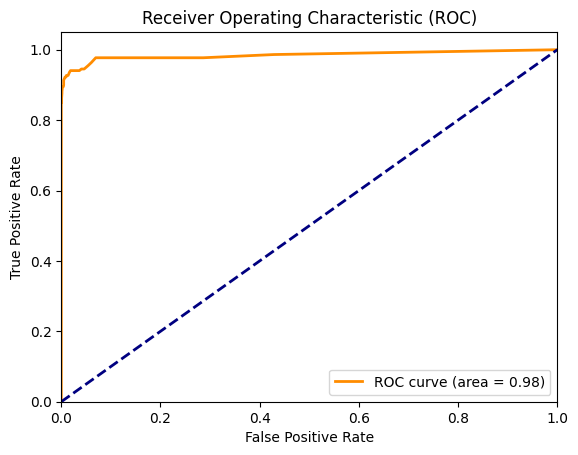

In [35]:
# Creando el modelo
rf_model = RandomForestClassifier()
rf_model.fit(X_train_bog_1, y_train)

# Predicción de los datos de prueba
y_pred = rf_model.predict(X_test_bog_1)

# Calculando métricas
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
probas = rf_model.predict_proba(X_test_bog_1)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1], pos_label='spam')
roc_auc = roc_auc_score(y_test, probas[:, 1])

# Resultados
print("Matriz de Confusión:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Curva ROC (AUC):", roc_auc)

# Gráfica de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Representación BoG (n=2)

Matriz de Confusión:
[[1453    0]
 [  65  154]]

Precision: 1.0
Accuracy: 0.9611244019138756
Recall: 0.7031963470319634
Curva ROC (AUC): 0.9717636632757922


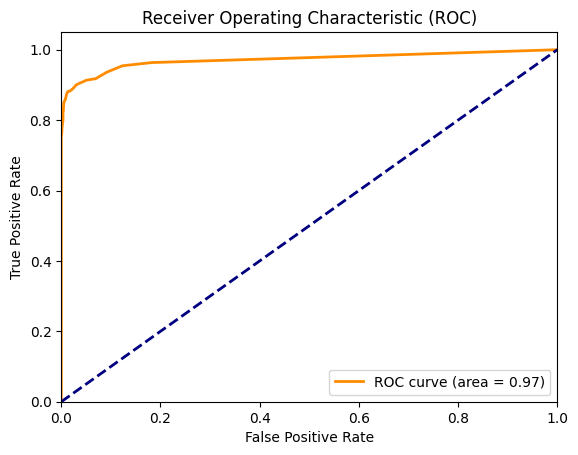

In [33]:
# Creando el modelo
rf_model = RandomForestClassifier()
rf_model.fit(X_train_bog_2, y_train)

# Predicción de los datos de prueba
y_pred = rf_model.predict(X_test_bog_2)

# Calculando métricas
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
accuracy = accuracy_score(y_test, y_pred)
probas = rf_model.predict_proba(X_test_bog_2)
fpr, tpr, _ = roc_curve(y_test, probas[:, 1], pos_label='spam')
roc_auc = roc_auc_score(y_test, probas[:, 1])

# Resultados
print("Matriz de Confusión:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Curva ROC (AUC):", roc_auc)

# Gráfica de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

TF-IDF

Matriz de Confusión (TF-IDF):
[[1453    0]
 [  41  178]]

Precision (TF-IDF): 1.0
Recall (TF-IDF): 0.8127853881278538
Curva ROC (AUC) (TF-IDF): 0.9806651016476695
Accuracy (TF-IDF): 0.9754784688995215


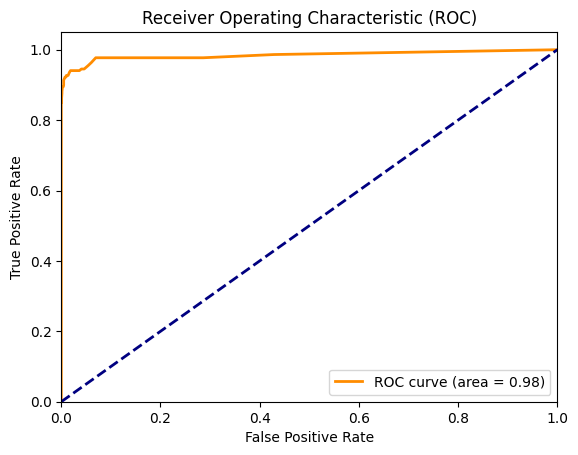

In [36]:
# Modelo de RandomForest con TF-IDF
rf_model_tfidf = RandomForestClassifier()
rf_model_tfidf.fit(X_train_tfidf, y_train)

# Realizando predicciones en el conjunto de prueba
y_pred_tfidf = rf_model_tfidf.predict(X_test_tfidf)

# Calculando métricas
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf, pos_label='spam')
recall_tfidf = recall_score(y_test, y_pred_tfidf, pos_label='spam')
probas_tfidf = rf_model_tfidf.predict_proba(X_test_tfidf)
fpr_tfidf, tpr_tfidf, _ = roc_curve(y_test, probas[:, 1], pos_label='spam')
roc_auc_tfidf = roc_auc_score(y_test, probas_tfidf[:, 1])
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

# Resultados
print("Matriz de Confusión (TF-IDF):")
print(conf_matrix_tfidf)
print("\nPrecision (TF-IDF):", precision_tfidf)
print("Recall (TF-IDF):", recall_tfidf)
print("Curva ROC (AUC) (TF-IDF):", roc_auc_tfidf)
print("Accuracy (TF-IDF):", accuracy_tfidf)

# Gráfica de la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Segundo modelo

Conversiones para mayor comodidad del modelo

In [49]:
# Convertiendo las etiquetas 'spam' a 1 y 'ham' a 0 en el conjunto de entrenamiento
y_train_numeric = [1 if label == 'spam' else 0 for label in y_train]

# Convertiendo las etiquetas 'spam' a 1 y 'ham' a 0 en el conjunto de prueba
y_test_numeric = [1 if label == 'spam' else 0 for label in y_test]

Representación BoG (n=1)

Matriz de Confusión:
[[1452    1]
 [  44  175]]

Precision: 0.9943181818181818
Recall: 0.7990867579908676
Curva ROC (AUC): 0.9617073163066807


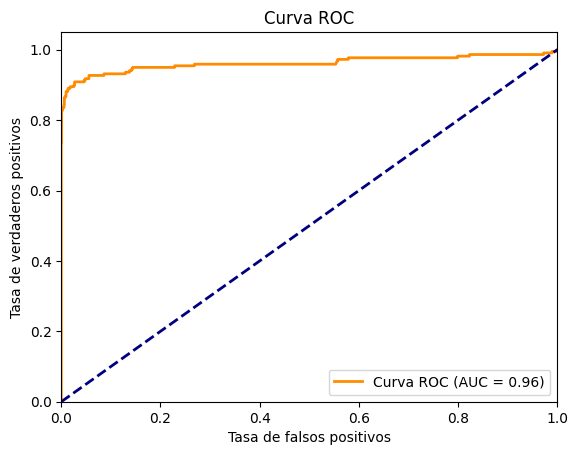

In [50]:
linear_model = LinearRegression()

linear_model.fit(X_train_bog_1, y_train_numeric)

y_pred_linear = linear_model.predict(X_test_bog_1)

y_pred_binary = (y_pred_linear >= 0.5).astype(int)

conf_matrix = confusion_matrix(y_test_numeric, y_pred_binary)

precision = precision_score(y_test_numeric, y_pred_binary)
recall = recall_score(y_test_numeric, y_pred_binary)

fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_linear)
roc_auc = roc_auc_score(y_test_numeric, y_pred_linear)

print("Matriz de Confusión:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("Curva ROC (AUC):", roc_auc)

# Gráfica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Representación BoG (n=2)

Matriz de Confusión:
[[1452    1]
 [  67  152]]

Precision: 0.9934640522875817
Recall: 0.6940639269406392
Curva ROC (AUC): 0.9656952864016191


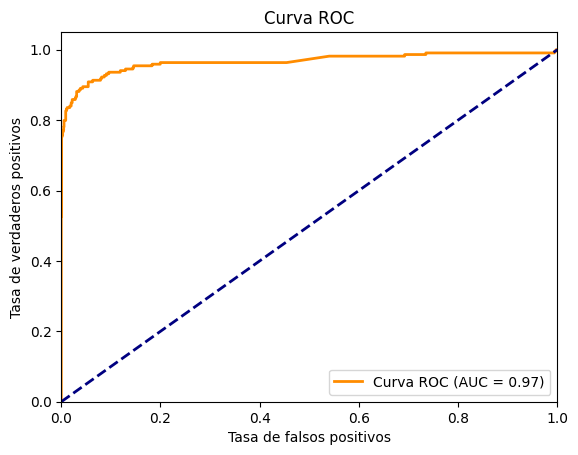

In [51]:
linear_model = LinearRegression()

linear_model.fit(X_train_bog_2, y_train_numeric)

y_pred_linear = linear_model.predict(X_test_bog_2)

y_pred_binary = (y_pred_linear >= 0.5).astype(int)

conf_matrix = confusion_matrix(y_test_numeric, y_pred_binary)

precision = precision_score(y_test_numeric, y_pred_binary)
recall = recall_score(y_test_numeric, y_pred_binary)

fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_linear)
roc_auc = roc_auc_score(y_test_numeric, y_pred_linear)

print("Matriz de Confusión:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("Curva ROC (AUC):", roc_auc)

# Gráfica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Representación TF-IDF

Matriz de Confusión:
[[1449    4]
 [  43  176]]

Precision: 0.9777777777777777
Recall: 0.8036529680365296
Curva ROC (AUC): 0.9609153789828633


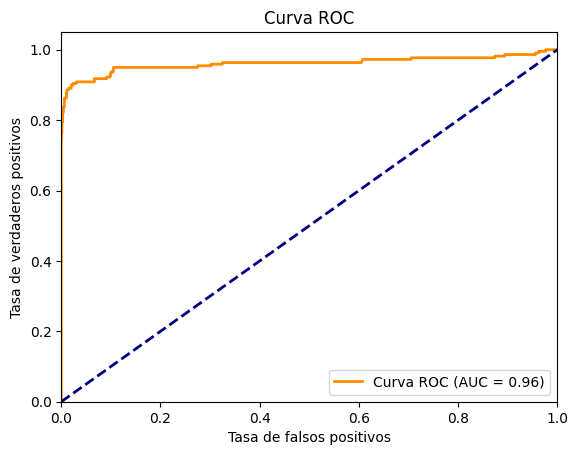

In [52]:
linear_model = LinearRegression()

linear_model.fit(X_train_tfidf, y_train_numeric)

y_pred_linear = linear_model.predict(X_test_tfidf)

y_pred_binary = (y_pred_linear >= 0.5).astype(int)

conf_matrix = confusion_matrix(y_test_numeric, y_pred_binary)

precision = precision_score(y_test_numeric, y_pred_binary)
recall = recall_score(y_test_numeric, y_pred_binary)

fpr, tpr, _ = roc_curve(y_test_numeric, y_pred_linear)
roc_auc = roc_auc_score(y_test_numeric, y_pred_linear)

print("Matriz de Confusión:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Recall:", recall)
print("Curva ROC (AUC):", roc_auc)

# Gráfica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()